In [107]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [108]:
lats = np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [109]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(83.70543797723366, 54.48406567333424),
 (50.31291702157023, -165.4191476827621),
 (-43.25432498518324, -138.9388223649807),
 (65.29508976275099, 134.1270927269033),
 (-21.0645157336821, -18.761279590921134),
 (-88.15445167138877, -154.29326755104833),
 (-70.94722331950457, -171.03472046320138),
 (87.1113693352068, 30.3623778394078),
 (-46.311836720020125, 50.14981725000578),
 (-36.047078814365136, -0.3648991844070508),
 (-4.964781059929734, -152.86007240933031),
 (-58.78098487660056, -163.63614051722502),
 (55.78710086040235, 77.54650180285648),
 (-68.90504065026931, 128.0648867225911),
 (-75.58898128270397, 179.94938970681108),
 (45.229314469080464, -113.16509422889033),
 (89.23564153714668, 56.973589247873065),
 (-29.49636925899115, 38.0758815677888),
 (-38.54772107820344, 155.6116117435747),
 (-35.65818859336308, 77.91484508994711),
 (37.11329099486164, 41.753712026892686),
 (12.217605502223975, -111.73196504623397),
 (27.706658288410154, -105.84833869732381),
 (-0.371142693396393

In [110]:
city = citipy.nearest_city(22.99, 120.21)
city

In [111]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [112]:
# Import the datetime module from the datetime library.


In [113]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [143]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1





# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | verkhoyansk
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | mehamn
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | vengerovo
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | dillon
Processing Record 17 of Set 1 | richards bay
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | idil
Processing Record 21 of Set 1 | san patricio
Processing Record 

Processing Record 37 of Set 4 | badarpur
Processing Record 38 of Set 4 | suntar
Processing Record 39 of Set 4 | santa lucia
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | qandala
Processing Record 42 of Set 4 | nanortalik
Processing Record 43 of Set 4 | juba
Processing Record 44 of Set 4 | pandamatenga
Processing Record 45 of Set 4 | lata
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | milas
Processing Record 48 of Set 4 | leningradskiy
Processing Record 49 of Set 4 | souillac
Processing Record 50 of Set 4 | camargo
Processing Record 1 of Set 5 | gap
Processing Record 2 of Set 5 | noumea
Processing Record 3 of Set 5 | siuna
Processing Record 4 of Set 5 | kloulklubed
Processing Record 5 of Set 5 | kysyl-syr
Processing Record 6 of Set 5 | imbituba
Processing Record 7 of Set 5 | nikologory
Processing Record 8 of Set 5 | avera
Processing Record 9 of Set 5 | abyek
Processing Record 10 of Set 5 | cabo san lucas
Processing Record 11 of Set 5 |

Processing Record 30 of Set 8 | katherine
Processing Record 31 of Set 8 | namatanai
Processing Record 32 of Set 8 | khargone
Processing Record 33 of Set 8 | zgierz
Processing Record 34 of Set 8 | burnie
Processing Record 35 of Set 8 | barra patuca
Processing Record 36 of Set 8 | batagay
Processing Record 37 of Set 8 | ulcinj
Processing Record 38 of Set 8 | grande prairie
Processing Record 39 of Set 8 | aklavik
Processing Record 40 of Set 8 | saint george
Processing Record 41 of Set 8 | minna
Processing Record 42 of Set 8 | rocha
Processing Record 43 of Set 8 | vostok
Processing Record 44 of Set 8 | ilulissat
Processing Record 45 of Set 8 | flinders
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | bam
Processing Record 48 of Set 8 | todos santos
Processing Record 49 of Set 8 | tidore
City not found. Skipping...
Processing Record 50 of Set 8 | myrtle beach
Processing Record 1 of Set 9 | kerema
Processing Record 2 of Set 9 | ayan
Processing Record 3 of Set 9 | princ

Processing Record 20 of Set 12 | cedral
Processing Record 21 of Set 12 | uruzgan
Processing Record 22 of Set 12 | antalaha
Processing Record 23 of Set 12 | antofagasta
Processing Record 24 of Set 12 | teahupoo
Processing Record 25 of Set 12 | verkhnedneprovskiy
Processing Record 26 of Set 12 | barabai
Processing Record 27 of Set 12 | shetpe
Processing Record 28 of Set 12 | arman
Processing Record 29 of Set 12 | lokosovo
Processing Record 30 of Set 12 | naron
Processing Record 31 of Set 12 | kununurra
Processing Record 32 of Set 12 | moose factory
Processing Record 33 of Set 12 | tekeli
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 36 of Set 12 | wajir
Processing Record 37 of Set 12 | tingi
Processing Record 38 of Set 12 | grand gaube
Processing Record 39 of Set 12 | launceston
Processing Record 40 of Set 12 | halalo
City not found. Skipping...
Processing Record 41 of Set 12 | sault sainte marie
Proces

In [144]:
len(city_data)


560

In [145]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,37.00,47,1,6.93,US,2020-11-03 02:01:00
1,Rikitea,-23.12,-134.97,71.87,80,10,17.49,PF,2020-11-03 02:01:34
2,Verkhoyansk,67.54,133.38,-11.85,82,53,2.06,RU,2020-11-03 02:01:06
3,Georgetown,5.41,100.34,80.60,83,20,3.36,MY,2020-11-03 02:01:35
4,Mataura,-46.19,168.86,67.73,37,0,4.76,NZ,2020-11-03 02:01:35
5,Vaini,-21.20,-175.20,77.00,88,75,11.41,TO,2020-11-03 02:01:35
6,Mehamn,71.04,27.85,42.31,85,74,19.06,NO,2020-11-03 02:01:35
7,Luderitz,-26.65,15.16,60.35,83,14,7.00,NA,2020-11-03 02:01:36
8,Faanui,-16.48,-151.75,80.01,78,1,17.87,PF,2020-11-03 02:01:36
9,Avarua,-21.21,-159.78,75.20,69,100,24.16,CK,2020-11-03 02:01:36


In [147]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2020-11-03 02:01:00,41.37,-73.41,37.00,47,1,6.93
1,Rikitea,PF,2020-11-03 02:01:34,-23.12,-134.97,71.87,80,10,17.49
2,Verkhoyansk,RU,2020-11-03 02:01:06,67.54,133.38,-11.85,82,53,2.06
3,Georgetown,MY,2020-11-03 02:01:35,5.41,100.34,80.60,83,20,3.36
4,Mataura,NZ,2020-11-03 02:01:35,-46.19,168.86,67.73,37,0,4.76
...,...,...,...,...,...,...,...,...,...
555,Lashio,MM,2020-11-03 02:03:14,22.93,97.75,69.91,94,72,0.51
556,Qasigiannguit,GL,2020-11-03 02:03:14,68.82,-51.19,19.40,57,100,27.51
557,Gasa,PS,2020-11-03 02:03:14,31.50,34.47,68.00,72,40,4.70
558,Cururupu,BR,2020-11-03 02:00:18,-1.83,-44.87,76.41,89,8,3.53


In [149]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [150]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

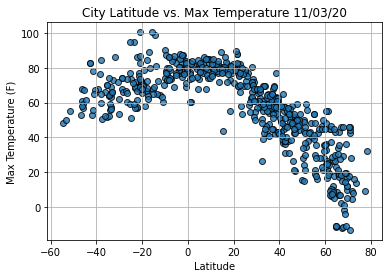

In [152]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,max_temps,
            edgecolor="k",
            linewidths=1,
            marker='o',
            alpha=.8,
            label='cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



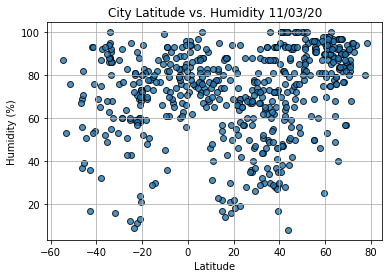

In [153]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

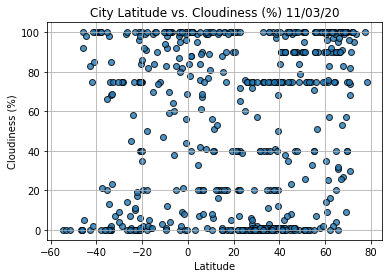

In [154]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

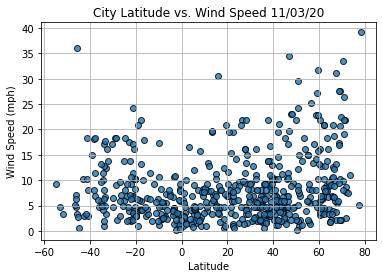

In [155]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()